### Capstone Project – FIFA World Cup 2018 Twitter Analysis

Miles Rousseau
Submission date: 11/7/22

Introduction:
The FIFA World Cup is one of the most watched sporting events in the world, and millions of fans worldwide chime in on Twitter to voice their opinions on the proceedings. With the next world cup approaching this November, I will be looking into what fans on Twitter had to say about the last installment of the World Cup in 2018.
The goal of this analysis is to gain insights about the likes and dislikes fans expressed on Twitter in order to create suggestions that FIFA can use to further improve the fan experience.

I downloaded my dataset from this Kaggle upload: https://www.kaggle.com/datasets/rgupta09/world-cup-2018-tweets
The data is a collection of 530K tweets starting from the Round of 16 until the Final, 6/29/22 until 7/15/22.
The dataset uploader used Tweepy API to collect tweets.
Additionally, the dataset had been pre-processed to only include English language tweets and had been cleaned of all non-language elements, such as website names, special characters, retweets, user mentions and hastags. 

The main data of interest is the actual tweet string. This has been pre-processed to only contain a string of English language words that will be encoded into individual columns. Each word column measures how many times the word appeared in the tweet. Additionally, there is a column containing the hashtags and mentions used in the tweet.
Then there are four numerical columns containing data on how many retweets, the number of characters in the tweet, the number of likes the tweet got and the number of followers the ‘tweeter’ had when making the tweet.
There is also a column containing the datetime of the tweet, a column containing the location where the tweet was posted, a column containing the device used to tweet
Finally, there will be a column for tweet sentiment.


This notebook will accomplish some of the tweet analysis and visualization, it will be sumplemented by work done in tableau in order to paint the full picture of what the fans thought about various topics and themes in the fifa world cup 2018.

Table of contents:
- EDA - cleaning data, inspecting data and initial exploration of data
- Vadar sentiment analysis
- Vectorizing tweets, hashtags and user mentions and seeing how they interact with sentiment
- Basic topic modelling to look for interesting trends 
- In depth exploration of data on topics to be visualized on dashboard

### EDA 

In [1]:
#importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in initial csv file of all tweets 
fifa = pd.read_csv('fifa.csv')

In [3]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                530000 non-null  int64 
 1   lang              530000 non-null  object
 2   Date              530000 non-null  object
 3   Source            530000 non-null  object
 4   len               530000 non-null  int64 
 5   Orig_Tweet        530000 non-null  object
 6   Tweet             529449 non-null  object
 7   Likes             530000 non-null  int64 
 8   RTs               530000 non-null  int64 
 9   Hashtags          468457 non-null  object
 10  UserMentionNames  455841 non-null  object
 11  UserMentionID     455841 non-null  object
 12  Name              529945 non-null  object
 13  Place             390710 non-null  object
 14  Followers         530000 non-null  int64 
 15  Friends           530000 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 

530000 rows total, 16 columns

In [4]:
fifa.head()

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216


In [5]:
fifa.iloc[356000]

ID                                                1018377630754705408
lang                                                               en
Date                                              2018-07-15 06:12:02
Source                                             Twitter for iPhone
len                                                                85
Orig_Tweet          RT @BleacherReport: One more sleep til the #Wo...
Tweet                                    One more sleep til the final
Likes                                                               0
RTs                                                              1110
Hashtags                                                     WorldCup
UserMentionNames                                      Bleacher Report
UserMentionID                                          BleacherReport
Name                                                 Comeback kid #23
Place                                                             NaN
Followers           

In [6]:
#Looking at null rows
fifa.isna().sum()

ID                       0
lang                     0
Date                     0
Source                   0
len                      0
Orig_Tweet               0
Tweet                  551
Likes                    0
RTs                      0
Hashtags             61543
UserMentionNames     74159
UserMentionID        74159
Name                    55
Place               139290
Followers                0
Friends                  0
dtype: int64

In [7]:
#Looking at tweets 
fifa['Tweet'].isna() == False

0         True
1         True
2         True
3         True
4         True
          ... 
529995    True
529996    True
529997    True
529998    True
529999    True
Name: Tweet, Length: 530000, dtype: bool

In [8]:
#Looking at original tweets column
pd.set_option('display.max_colwidth', 1500)
pd.set_option('expand_frame_repr', True)
pd.options.display.max_colwidth = 1000000
print(fifa['Orig_Tweet'])

0              RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…
1                           RT @FCBarcelona: ?? @ivanrakitic scores the winning penalty to send @HNS_CFF into the #WorldCup quarter-finals, where they'll face Russia!…
2                                                           RT @javierfernandez: Tonight we have big game.... @EvgeniPlushenko ?????? #worldcup https://t.co/LKifuNlubC
3         We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #XiuminLeague \r\n@weareoneEXO @FIFAWorldCup
4              RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…
                                                                                      ...                                                                       

In [9]:
#Looking at tweets that have been cleaned column
pd.set_option('display.max_colwidth', 1500)
pd.set_option('expand_frame_repr', True)
pd.options.display.max_colwidth = 1000000
print(fifa['Tweet'])

0                             Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs
1                      scores the winning penalty to send into the quarter finals where they will face Russia
2                                                                                    Tonight we have big game
3                                               We get stronger Turn the music up now We got that power power
4                             Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs
                                                         ...                                                 
529995                                                                     France have won the FIFA in Moscow
529996                                     Beyonc JAY performed in blue jersey to celebrate Frances win today
529997              They don say immigrants are ruining France when they re taking political credit for glory
529998    

In [10]:
#removing all tweets that haven't been cleaned, new rows are now at 529449 rows 
fifa_clean = fifa[fifa['Tweet'].isna() == False]

In [11]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529449 entries, 0 to 529999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                529449 non-null  int64 
 1   lang              529449 non-null  object
 2   Date              529449 non-null  object
 3   Source            529449 non-null  object
 4   len               529449 non-null  int64 
 5   Orig_Tweet        529449 non-null  object
 6   Tweet             529449 non-null  object
 7   Likes             529449 non-null  int64 
 8   RTs               529449 non-null  int64 
 9   Hashtags          467991 non-null  object
 10  UserMentionNames  455303 non-null  object
 11  UserMentionID     455303 non-null  object
 12  Name              529394 non-null  object
 13  Place             390315 non-null  object
 14  Followers         529449 non-null  int64 
 15  Friends           529449 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 

529449 max rows, 16 columns

Place column needs to be cleaned and filled.

Hastags, user mentions and user mention Id needs to be filled with none instead of NAN.

In [12]:
#converting date column to datetime 
fifa_clean['Date'] = pd.to_datetime(fifa_clean['Date'], infer_datetime_format=True)

C:\Users\miles\AppData\Local\Temp\ipykernel_49380\1895432537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_clean['Date'] = pd.to_datetime(fifa_clean['Date'], infer_datetime_format=True)


In [13]:
#looking at place column
#exporting to take deeper look
counts = fifa_clean['Place'].value_counts()
counts.to_csv('places_counts_capstone')

In [14]:
#filling all empty cells with other as location
fifa_clean['Place'] = fifa_clean['Place'].fillna('Other')

C:\Users\miles\AppData\Local\Temp\ipykernel_49380\2338345089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_clean['Place'] = fifa_clean['Place'].fillna('Other')


In [15]:
fifa_clean['Place'].value_counts()

Other                         139134
Lagos, Nigeria                  4952
London, England                 4700
Nigeria                         3615
London                          3225
                               ...  
Vgods crib                         1
Chilensis                          1
longliveX                          1
Khobar, Dammam & Jubail IC         1
HOUSTON.TX.BABYY.                  1
Name: Place, Length: 95127, dtype: int64

I will be cleaning data for the biggest markets noticed in the database: India, usa, nigeria, united kingdom, south africa, pakistan, canada. Additionally, i will be combining all data from places that have greater than 100 tweets.

In [16]:
#replacing anything containing nigeria or lagos as nigeria
fifa_clean.loc[fifa_clean['Place'].str.contains("Lagos|Nigeria|Nairobi|nigeria|Abuja|Federal Capital Territory|lagos")==True, 'Place'] = 'Nigeria'

In [17]:
fifa_clean['Place'].value_counts()

Other                             139134
Nigeria                            24202
London, England                     4700
London                              3225
India                               2840
                                   ...  
Kulim?PD?K.Lumpur?J.Bahru,Msia         1
Vgods crib                             1
Chilensis                              1
longliveX                              1
HOUSTON.TX.BABYY.                      1
Name: Place, Length: 93425, dtype: int64

In [18]:
#replacing all uk common places tweets location
fifa_clean.loc[fifa_clean['Place'].str.contains("Dublin|UK|England|United Kingdom|London|Manchester|Scotland|Ireland|Glasgow|Anfield|Kent|Liverpool|Southampton|Cardiff|Essex|Wales|Bristol|Newcastle|Nottingham|LDN|Edinburgh|Coventry|Stamford|Trafford|Leicester|Sheffield|Birmingham|london|Leeds")==True, 'Place'] = 'United Kingdom'

In [19]:
fifa_clean['Place'].value_counts()

Other                            139134
United Kingdom                    50953
Nigeria                           24202
India                              2840
Indonesia                          2815
                                  ...  
The Streets (La Isla Loco)            1
Berriac, France                       1
alkhobar , saudi arabia               1
Belo Horizonte - MG - Brazil          1
HOUSTON.TX.BABYY.                     1
Name: Place, Length: 85496, dtype: int64

In [20]:
#usa common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Las Vegas|Estados|Los Angeles|USA|Brooklyn|United States|usa|California|Boston|New York|Philadelphia|Florida|Miami|Houston|Chicago|Georgia|Francisco|Texas|New Jersey|Atlanta|Dallas|Washington")==True, 'Place'] = 'USA'

In [21]:
fifa_clean['Place'].value_counts()

Other                139134
United Kingdom        50953
USA                   26847
Nigeria               24202
India                  2840
                      ...  
Barrington, RI            1
enemy's mind              1
Praha                     1
Padiham                   1
HOUSTON.TX.BABYY.         1
Name: Place, Length: 82078, dtype: int64

In [22]:
#india common places
fifa_clean.loc[fifa_clean['Place'].str.contains("India|Mumbai|New Dehli|Bangalore|Delhi|Chennai|india")==True, 'Place'] = 'India'

In [23]:
fifa_clean['Place'].value_counts()

Other                      139134
United Kingdom              50953
USA                         26847
Nigeria                     24202
India                       15195
                            ...  
montageimages@gmail.com         1
bangtan's heart                 1
uu? uoo???uo?                   1
Dubai, UAE                      1
HOUSTON.TX.BABYY.               1
Name: Place, Length: 80383, dtype: int64

In [24]:
#south africa common places
fifa_clean.loc[fifa_clean['Place'].str.contains("South Africa|Johannesburg|Cape Town|Pretoria|Durban")==True, 'Place'] = 'South Africa'

In [25]:
#canada common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Canada|Toronto|Montréal|Vancouver|Ontario|Alberta")==True, 'Place'] =  'Canada'

In [26]:
#france common places
fifa_clean.loc[fifa_clean['Place'].str.contains("France|Paris")==True, 'Place'] = 'France'

In [27]:
#Indonesia common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Indonesia|Jakarta|Bandung|indonesia")==True, 'Place'] = 'Indonesia'

In [28]:
#Malaysia common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Malaysia|Kuala Lumpur|lumpur|Jawa Timur|Johor|Shah")==True, 'Place'] = 'Malaysia'

In [29]:
#Mexico common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Mexico|México|Monterrey")==True, 'Place'] = 'Mexico'

In [30]:
#Ghana common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Ghana|Accra|ghana")==True, 'Place'] = 'Ghana'

In [31]:
#Singapore common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Singapore")==True, 'Place'] = 'Singapore'

In [32]:
#Thailand common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Thailand|Bangkok")==True, 'Place'] = 'Thailand'

In [33]:
#Kenya common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Kenya")==True, 'Place'] = 'Kenya'

In [34]:
#Uganda common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Uganda|Kampala")==True, 'Place'] = 'Uganda'

In [35]:
#Pakistan common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Pakistan|Karachi|Islamabad")==True, 'Place'] = 'Pakistan'

In [36]:
#Egypt common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Egypt")==True, 'Place'] = 'Egypt'

In [37]:
#Argentina common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Argentina")==True, 'Place'] = 'Argentina'

In [38]:
#Maldives common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Maldives")==True, 'Place'] = 'Maldives'

In [39]:
#Brasil common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Brasil|Rio de|Brazil|São Paulo")==True, 'Place'] = 'Brasil'

In [40]:
#Colombia common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Colombia|Bogot")==True, 'Place'] = 'Colombia'

In [41]:
#Phillipines common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Philippines")==True, 'Place'] = 'Philippines'

In [42]:
#Spain common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Spain|Madrid|España|Barcelona")==True, 'Place'] = 'Spain'

In [43]:
#Uraguay common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Uruguay")==True, 'Place'] = 'Uruguay'

In [44]:
#Australia common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Australia|Sydney|Melbourne")==True, 'Place'] = 'Australia'

In [45]:
fifa_clean['Place'].value_counts().head(70)

Other               139134
United Kingdom       50953
USA                  26847
Nigeria              24202
India                15195
                     ...  
San Antonio, TX        229
Harare, Zimbabwe       229
Japan                  227
Orlando, FL            221
?? ???                 220
Name: Place, Length: 70, dtype: int64

In [46]:
#cleaning up all values that have ?, or earth  in them to change to other
fifa_clean.loc[fifa_clean['Place'].str.contains("\?|Unknown|Universe|Gotham|Home|earth|ArenA|Earth|Heaven|worldwide|Worldwide|Everywhere|Global|Wakanda|6|Somewhere|World|Mars|Hogwarts|Europe|Neverland|Here")==True, 'Place'] = 'Other'

In [47]:
#UAE common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Dubai|UAE|United Arab Emirates")==True, 'Place'] = 'UAE'

In [48]:
#Iran common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Iran")==True, 'Place']  = 'Iran'

In [49]:
#NZ common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Zealand")==True, 'Place']  = 'New Zealand'

In [50]:
#Croatia common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Croatia")==True, 'Place'] = 'Croatia'

In [51]:
#Peru common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Peru|Péru|Lima|Perú")==True, 'Place'] = 'Peru'

In [52]:
#bnglasdesh common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Bangladesh")==True, 'Place'] = 'Bangladesh'

In [53]:
#common places
fifa_clean.loc[fifa_clean['Place'].str.contains("Jamaica")==True, 'Place'] = 'Jamaica'
fifa_clean.loc[fifa_clean['Place'].str.contains("Trinidad|Tobago")==True, 'Place'] = 'Trinidad and Tobago'
fifa_clean.loc[fifa_clean['Place'].str.contains("Belgium|Belgique|België")==True, 'Place'] = 'Belgium'
fifa_clean.loc[fifa_clean['Place'].str.contains("Sri|Lanka")==True, 'Place'] = 'Sri lanka'
fifa_clean.loc[fifa_clean['Place'].str.contains("Portugal")==True, 'Place'] = 'Portugal'
fifa_clean.loc[fifa_clean['Place'].str.contains("Russia|Moscow")==True, 'Place'] = 'Russia'
fifa_clean.loc[fifa_clean['Place'].str.contains("Germany|Deutschland")==True, 'Place'] = 'Germany'
fifa_clean.loc[fifa_clean['Place'].str.contains("Africa")==True, 'Place'] = 'Africa'
fifa_clean.loc[fifa_clean['Place'].str.contains("Zimbabwe")==True, 'Place'] = 'Zimbabwe'
fifa_clean.loc[fifa_clean['Place'].str.contains("Korea")==True, 'Place'] = 'Korea'
fifa_clean.loc[fifa_clean['Place'].str.contains("Myanmar")==True, 'Place'] = 'Myanmar'
fifa_clean.loc[fifa_clean['Place'].str.contains("Japan|Tokyo")==True, 'Place'] = 'Japan'
fifa_clean.loc[fifa_clean['Place'].str.contains("Saudi|Riyadh")==True, 'Place'] = 'Saudi Arabia'
fifa_clean.loc[fifa_clean['Place'].str.contains("Costa Rica")==True, 'Place'] = 'Costa Rica'
fifa_clean.loc[fifa_clean['Place'].str.contains("Chile")==True, 'Place'] = 'Chile'
fifa_clean.loc[fifa_clean['Place'].str.contains("venezuela|Venezuela")==True, 'Place'] = 'Venezuela'
fifa_clean.loc[fifa_clean['Place'].str.contains("Tanzania")==True, 'Place'] = 'Tanzania'
fifa_clean.loc[fifa_clean['Place'].str.contains("Ecuador")==True, 'Place'] = 'Ecuador'
fifa_clean.loc[fifa_clean['Place'].str.contains("Lebanon")==True, 'Place'] = 'Lebanon'
fifa_clean.loc[fifa_clean['Place'].str.contains("Guatemala")==True, 'Place'] = 'Guatemala'
fifa_clean.loc[fifa_clean['Place'].str.contains("Qatar")==True, 'Place'] = 'Qatar'
fifa_clean.loc[fifa_clean['Place'].str.contains("China")==True, 'Place'] = 'China'
fifa_clean.loc[fifa_clean['Place'].str.contains("Polska|Poland")==True, 'Place'] = 'Poland'
fifa_clean.loc[fifa_clean['Place'].str.contains("Turkey")==True, 'Place'] = 'Turkey'

In [54]:
#USA states abbreviations
fifa_clean.loc[fifa_clean['Place'].str.contains("AL|AK|AZ|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS \
                                                |KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA \
                                                |RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|PA")==True, 'Place'] = 'USA'

In [55]:
fifa_clean['Place'].value_counts().head(72)

Other              175418
USA                 52110
United Kingdom      50953
Nigeria             24202
India               15195
                    ...  
Barbados              104
The Netherlands       102
Paraguay              100
Jeddah                 99
El Salvador            98
Name: Place, Length: 72, dtype: int64

All location data with greater than 100 tweets has now been properly classified. 

In [56]:
#Total number of rows properly classified
sum(fifa_clean['Place'].value_counts().head(70))

415187

In [57]:
#nuber of grouped rows that will be converted to other
sum(fifa_clean['Place'].value_counts() < 100)

48546

Creating a list of all places with less than 100 tweets from that location

In [58]:
other_places = fifa_clean['Place'].value_counts() 

In [59]:
other_places_list = other_places[other_places < 100].index

Making all tweets with places that have less than 100 tweets come from other

In [60]:
fifa_clean.loc[fifa_clean['Place'].isin(other_places_list), 'Place'] = 'Other'

In [61]:
#checking changes
fifa_clean['Place'].value_counts()

Other              289680
USA                 52110
United Kingdom      50953
Nigeria             24202
India               15195
                    ...  
Sweden                121
Côte d'Ivoire         114
Barbados              104
The Netherlands       102
Paraguay              100
Name: Place, Length: 70, dtype: int64

Rechecking pandas df

In [62]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529449 entries, 0 to 529999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                529449 non-null  int64         
 1   lang              529449 non-null  object        
 2   Date              529449 non-null  datetime64[ns]
 3   Source            529449 non-null  object        
 4   len               529449 non-null  int64         
 5   Orig_Tweet        529449 non-null  object        
 6   Tweet             529449 non-null  object        
 7   Likes             529449 non-null  int64         
 8   RTs               529449 non-null  int64         
 9   Hashtags          467991 non-null  object        
 10  UserMentionNames  455303 non-null  object        
 11  UserMentionID     455303 non-null  object        
 12  Name              529394 non-null  object        
 13  Place             529449 non-null  object        
 14  Foll

In [63]:
fifa_clean.head(100)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Ghana,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,"RT @FCBarcelona: ?? @ivanrakitic scores the winning penalty to send @HNS_CFF into the #WorldCup quarter-finals, where they'll face Russia!…",scores the winning penalty to send into the quarter finals where they will face Russia,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Other,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game.... @EvgeniPlushenko ?????? #worldcup https://t.co/LKifuNlubC,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,Other,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #XiuminLeague \r\n@weareoneEXO @FIFAWorldCup,We get stronger Turn the music up now We got that power power,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,Other,17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,Other,137,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1013596852569235458,en,2018-07-02 01:34:56,Twitter Web Client,137,"Don’t worry anymore, stop\r\nTime is ticking, even now, tick tock #LayLeague #PowerByEXO #WorldCup #FIFAStadiumDJ @FIFAWorldCup @weareoneEXO",Don worry anymore stop Time is ticking even now tick tock,0,0,"LayLeague,PowerByEXO,WorldCup,FIFAStadiumDJ","FIFA World Cup ?,EXO","FIFAWorldCup,weareoneEXO",Minseok el inmortal,Mexico,115,4
96,1013596851885543429,en,2018-07-02 01:34:55,Twitter for iPhone,140,RT @FootbaIIBattIes: What will be the result of #ESPRUS? RT if you vote please!\r\n\r\n#WorldCup? ?? ?? ?? ?? ?? ?? ?? ?? ?? ?? ?? ?? ?? ?? ?? ??…,What will be the result of RT if you vote please,0,21,"ESPRUS,WorldCup",Football Battles,FootbaIIBattIes,ethan,Other,46,179
97,1013596851600101376,en,2018-07-02 01:34:55,Twitter for Android,140,RT @kyodo_sports_en: #Japan coach admits his team have not practiced penalties for knockout match with #Belgium. #WorldCup #Russia2018 #JPN…,coach admits his team have not practiced penalties for knockout match with,0,2,"Japan,Belgium,WorldCup,Russia2018,JPN",Kyodo News Sports,kyodo_sports_en,Beauty and her bed.,Other,103,160
98,1013596848848711680,en,2018-07-02 01:34:55,Twitter for Android,120,RT @callmebabeex: Please play power by EXO ??\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #KAILeague\r\n@weareoneEXO @FIFAWorldCup,Please play power by EXO,0,6,"PowerByEXO,WorldCup,FIFAStadiumDJ,KAILeague","What if ?,EXO,FIFA World Cup ?","callmebabeex,weareoneEXO,FIFAWorldCup",michigo,Other,16,70


The columns, ID, la, usermentionId and name dont provide any value and can be dropped.

In [64]:
#dropping columns
fifa_clean = fifa_clean.drop(['ID','lang','UserMentionID', 'Name',], axis = 1)

In [65]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529449 entries, 0 to 529999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              529449 non-null  datetime64[ns]
 1   Source            529449 non-null  object        
 2   len               529449 non-null  int64         
 3   Orig_Tweet        529449 non-null  object        
 4   Tweet             529449 non-null  object        
 5   Likes             529449 non-null  int64         
 6   RTs               529449 non-null  int64         
 7   Hashtags          467991 non-null  object        
 8   UserMentionNames  455303 non-null  object        
 9   Place             529449 non-null  object        
 10  Followers         529449 non-null  int64         
 11  Friends           529449 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 52.5+ MB


In some tweets, no hashtags or mentions were made, in these cases I will fill the values with none to represent no hashtags or mentions

In [66]:
fifa_clean['Hashtags'] = fifa_clean['Hashtags'].fillna('None')

In [67]:
fifa_clean['UserMentionNames'] = fifa_clean['UserMentionNames'].fillna('None')

In [119]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529449 entries, 0 to 529448
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              529449 non-null  datetime64[ns]
 1   Source            529449 non-null  object        
 2   len               529449 non-null  int64         
 3   Orig_Tweet        529449 non-null  object        
 4   Tweet             529449 non-null  object        
 5   Likes             529449 non-null  int64         
 6   RTs               529449 non-null  int64         
 7   Hashtags          529449 non-null  object        
 8   UserMentionNames  529449 non-null  object        
 9   Place             529449 non-null  object        
 10  Followers         529449 non-null  int64         
 11  Friends           529449 non-null  int64         
 12  vadar compound    529449 non-null  float64       
 13  vadar sentiment   529449 non-null  object        
dtypes: d

In [69]:
#resetting index
fifa_clean = fifa_clean.reset_index(drop=True)

In [70]:
fifa_clean.head()

,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,Place,Followers,Friends
0,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Ghana,861,828
1,2018-07-02 01:35:44,Twitter for Android,139,"RT @FCBarcelona: ?? @ivanrakitic scores the winning penalty to send @HNS_CFF into the #WorldCup quarter-finals, where they'll face Russia!…",scores the winning penalty to send into the quarter finals where they will face Russia,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF",Other,667,686
2,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game.... @EvgeniPlushenko ?????? #worldcup https://t.co/LKifuNlubC,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko",Other,65,67
3,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #XiuminLeague \r\n@weareoneEXO @FIFAWorldCup,We get stronger Turn the music up now We got that power power,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?",Other,17,89
4,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Other,137,216


### fifa_clean is good here, initial EDA is done

### Now I will use vadar to analyze the sentiment of each tweet

Firstly, download nltk to use vadar

In [71]:
#nltk.download()

In [72]:
#setting up functions to use to get vadar sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']



def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or ne utral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label


In [73]:
fifa_clean['Tweet']

0                             Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs
1                      scores the winning penalty to send into the quarter finals where they will face Russia
2                                                                                    Tonight we have big game
3                                               We get stronger Turn the music up now We got that power power
4                             Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs
                                                         ...                                                 
529444                                                                     France have won the FIFA in Moscow
529445                                     Beyonc JAY performed in blue jersey to celebrate Frances win today
529446              They don say immigrants are ruining France when they re taking political credit for glory
529447    

In [74]:
# create new column for vadar compound sentiment score
fifa_clean['vadar compound'] = fifa_clean['Tweet'].apply(vadar_sentiment)


In [75]:
# new col with vadar sentiment label based on vadar compound score
fifa_clean['vadar sentiment'] = fifa_clean['vadar compound'].apply(categorise_sentiment)

Looking at vadar sentiment on the tweets

In [76]:
fifa_clean.head()

,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,Place,Followers,Friends,vadar compound,vadar sentiment
0,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Ghana,861,828,-0.3818,negative
1,2018-07-02 01:35:44,Twitter for Android,139,"RT @FCBarcelona: ?? @ivanrakitic scores the winning penalty to send @HNS_CFF into the #WorldCup quarter-finals, where they'll face Russia!…",scores the winning penalty to send into the quarter finals where they will face Russia,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF",Other,667,686,0.1027,positive
2,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game.... @EvgeniPlushenko ?????? #worldcup https://t.co/LKifuNlubC,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko",Other,65,67,0.0000,neutral
3,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe got that power power~\r\n\r\n#PowerByEXO #WorldCup #FIFAStadiumDJ #XiuminLeague \r\n@weareoneEXO @FIFAWorldCup,We get stronger Turn the music up now We got that power power,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?",Other,17,89,0.3818,positive
4,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved three penalties in a #WorldCup penalty shoot-out: \r\n\r\n1/7/2006: #POR's Ricardo vs. #ENG \r\n\r\n1/7/20…,Only two goalkeepers have saved three penalties in penalty shoot out Ricardo vs,0,477,"WorldCup,POR,ENG",Squawka Football,Other,137,216,-0.3818,negative


In [77]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529449 entries, 0 to 529448
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              529449 non-null  datetime64[ns]
 1   Source            529449 non-null  object        
 2   len               529449 non-null  int64         
 3   Orig_Tweet        529449 non-null  object        
 4   Tweet             529449 non-null  object        
 5   Likes             529449 non-null  int64         
 6   RTs               529449 non-null  int64         
 7   Hashtags          529449 non-null  object        
 8   UserMentionNames  529449 non-null  object        
 9   Place             529449 non-null  object        
 10  Followers         529449 non-null  int64         
 11  Friends           529449 non-null  int64         
 12  vadar compound    529449 non-null  float64       
 13  vadar sentiment   529449 non-null  object        
dtypes: d

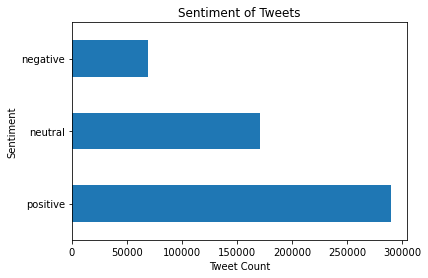

In [121]:
#distibution of tweets
plt.figure()
fifa_clean['vadar sentiment'].value_counts().plot(kind='barh')
plt.title('Sentiment of Tweets')
plt.xlabel('Tweet Count')
plt.ylabel('Sentiment')
plt.show()


54.7% of all tweets in the dataset were considered to be positive, 32.1% were neutral and 13.1% were negative.

Most tweets are classified as positive using the vadar sentiment analyzer, thus this should be kept in the back of one's mind when exploring various topics in the dataset.

### Now I will vectorize tweet data to look at various popular topics and how they are viewed based on twitter sentiment analysis

In [79]:
# importing vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
#creating relatively strict tokenizer
import string
import nltk
# Let's test it out
stemmer = nltk.stem.PorterStemmer()
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
#creating bag of words model
# 1. Instantiate 
bagofwords = CountVectorizer(min_df = 1000, tokenizer=my_tokenizer )

# 2. Fit 
bagofwords.fit(fifa_clean['Tweet'])

# 3. Transform
fifa_clean_transformed = bagofwords.transform(fifa_clean['Tweet'])
fifa_clean_transformed


C:\Users\miles\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<529449x600 sparse matrix of type '<class 'numpy.int64'>'
	with 2800241 stored elements in Compressed Sparse Row format>

In [82]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_tweet_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=fifa_clean_transformed.toarray())
display(my_tweet_df)

,absolut,action,add,adida,advanc,aerial,africa,african,age,ago,...,worldcup,worst,would,wow,xenophobi,xi,ye,year,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#all of the words from tweets that occured in more than 1000 tweets and with words stemmed and stop words taken out
bagofwords.get_feature_names_out()

array(['absolut', 'action', 'add', 'adida', 'advanc', 'aerial', 'africa',
       'african', 'age', 'ago', 'ahead', 'airplan', 'airport', 'allez',
       'alreadi', 'also', 'alway', 'amaz', 'angola', 'anoth', 'appreci',
       'argentina', 'around', 'arriv', 'arsen', 'ask', 'assist', 'award',
       'away', 'back', 'bad', 'ball', 'beat', 'beauti', 'becam', 'becom',
       'bed', 'begin', 'behind', 'belgium', 'believ', 'best', 'bet',
       'better', 'big', 'biggest', 'bit', 'blai', 'bleu', 'blue', 'book',
       'boot', 'born', 'boss', 'bottl', 'boy', 'brazil', 'break',
       'brilliant', 'bring', 'bt', 'ca', 'call', 'cameroon', 'cann',
       'captain', 'cavani', 'celebr', 'champion', 'chanc', 'chang',
       'charact', 'chariti', 'cheer', 'children', 'choic', 'clash',
       'class', 'close', 'coach', 'colombia', 'come', 'comment',
       'commiser', 'compani', 'competit', 'complet', 'confirm', 'congrat',
       'congratul', 'continu', 'could', 'countri', 'courtoi', 'creat',
       '

Looking at what the sentiment of of the tweet is when messi is mentioned in it

In [84]:
fifa_clean['vadar sentiment'][my_tweet_df['messi'] == 1].value_counts()

neutral     8363
positive    7032
negative    2703
Name: vadar sentiment, dtype: int64

Looking at what the sentiment of of the tweet is when lgbt is mentioned in it

In [85]:
fifa_clean['vadar sentiment'][my_tweet_df['lgbt'] == 1].value_counts()

negative    3621
positive      10
neutral        1
Name: vadar sentiment, dtype: int64

Looking at the sentiment when racism is mentioned

In [86]:
fifa_clean[my_tweet_df['racism'] == 1]

,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,Place,Followers,Friends,vadar compound,vadar sentiment
12475,2018-07-01 23:57:16,Twitter for Android,243,"@prodnose Goes to show that corruption isn't all bad, eh? Well done Sepp!\r\n\r\nOh, and the shininess is a lovely distraction from the wanton homophobia and racism in their society. Everything a #worldcup should be!\r\n\r\nAnyway: https://t.co/pzDylpbMe9",Goes to show that corruption is not all bad eh Well done Sepp Oh and the shininess is lovely distraction from the wanton homophobia and racism in their society Everything should be Anyway,0,0,worldcup,Danny Baker,United Kingdom,707,140,0.2617,positive
14238,2018-07-01 23:43:37,Twitter for Android,119,RT @RTUKnews: #WorldCup exposes England not Russia as the country with a racism problem (Op-Ed) https://t.co/jahVUNmpuf,exposes England not Russia as the country with racism problem Op Ed,0,169,WorldCup,RT UK,USA,2583,2808,-0.8074,negative
17703,2018-07-01 23:20:52,Twitter Web Client,119,RT @RTUKnews: #WorldCup exposes England not Russia as the country with a racism problem (Op-Ed) https://t.co/jahVUNmpuf,exposes England not Russia as the country with racism problem Op Ed,0,169,WorldCup,RT UK,United Kingdom,272,1739,-0.8074,negative
20324,2018-07-01 23:04:59,Twitter Web Client,119,RT @RTUKnews: #WorldCup exposes England not Russia as the country with a racism problem (Op-Ed) https://t.co/jahVUNmpuf,exposes England not Russia as the country with racism problem Op Ed,0,169,WorldCup,RT UK,Other,280,124,-0.8074,negative
30173,2018-07-01 22:17:26,Twitter for iPhone,304,"Aside from the fact that all African and Middle Eastern teams r eliminated, another reason not 2 watch any more #WorldCup games is b/c black soccer players face disgusting levels of racism, and FIFA refuses 2 address the problem\r\n\r\nProps to my boy @3mrKawji 4 shedding light on this https://t.co/ubXZqzVt7x",Aside from the fact that all African and Middle Eastern teams eliminated another reason not watch any more games is c black soccer players face disgusting levels of racism and FIFA refuses address the problem Props to my boy shedding light on this,3,1,WorldCup,Amr,USA,477,401,-0.8807,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529433,2018-07-15 22:49:13,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongratulations on winning the #WorldCup. \r\n\r\n80% of your team is African, cut out the racism and xenophobi…",Dear France Congratulations on winning the of your team is African cut out the racism and xenophobi,0,96746,WorldCup,Khaled Beydoun,Other,26,157,0.5719,positive
529436,2018-07-15 22:49:12,Twitter Web Client,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongratulations on winning the #WorldCup. \r\n\r\n80% of your team is African, cut out the racism and xenophobi…",Dear France Congratulations on winning the of your team is African cut out the racism and xenophobi,0,96746,WorldCup,Khaled Beydoun,Colombia,117,275,0.5719,positive
529441,2018-07-15 22:49:12,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongratulations on winning the #WorldCup. \r\n\r\n80% of your team is African, cut out the racism and xenophobi…",Dear France Congratulations on winning the of your team is African cut out the racism and xenophobi,0,96746,WorldCup,Khaled Beydoun,USA,125,703,0.5719,positive
529442,2018-07-15 22:49:12,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongratulations on winning the #WorldCup. \r\n\r\n80% of your team is African, cut out the racism and xenophobi…",Dear France Congratulations on winning the of your team is African cut out the racism and xenophobi,0,96746,WorldCup,Khaled Beydoun,Brasil,295,75,0.5719,positive


### Now I will vectorize hashtag data to look at various popular topics and how they are viewed based on twitter sentiment analysis

In [87]:
#creating bag of words model
# 1. Instantiate 
hashtags = CountVectorizer(min_df = 100)

# 2. Fit 
hashtags.fit(fifa_clean['Hashtags'])

# 3. Transform
hashtags_transformed = hashtags.transform(fifa_clean['Hashtags'])
hashtags_transformed


<529449x306 sparse matrix of type '<class 'numpy.int64'>'
	with 1017331 stored elements in Compressed Sparse Row format>

In [88]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_hashtag_df = pd.DataFrame(columns=hashtags.get_feature_names_out(), data=hashtags_transformed.toarray())
display(my_hashtag_df)

,2018,africa,airdrop,akinfeev,allezlesbleus,arg,argentina,argentinavsfrance,argentinavsfrancia,argfra,...,worldcup2018russia,worldcup2022,worldcupfinal,worldcupfinal2018,worldcupfinals,worldcupgot,worldcupqatar,worldcuprussia,worldcuprussia2018,xiuminleague
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529444,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
529445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
hashtags.get_feature_names_out()

array(['2018', 'africa', 'airdrop', 'akinfeev', 'allezlesbleus', 'arg',
       'argentina', 'argentinavsfrance', 'argentinavsfrancia', 'argfra',
       'atlutd', 'barçaworldcup', 'bbcworldcup', 'beinfwc', 'beinrussia',
       'bel', 'beleng', 'belfra', 'belgium', 'belgiumvsfrance', 'beljpn',
       'beproud', 'bitcoin', 'bra', 'brabel', 'bramex', 'brazil',
       'breaking', 'brexit', 'bts', 'btsarmy', 'campionidelmondo',
       'canadaday', 'cavani', 'cfc', 'champions', 'chanyeolleague',
       'chenleague', 'choicefandom', 'cinderellastories', 'cm2018', 'col',
       'coleng', 'colombia', 'comeonengland', 'competition',
       'contestalert', 'copa2018', 'costarica', 'coys', 'cr7',
       'cristiano', 'cristianoronaldo', 'cro', 'croatia',
       'croatiadenmark', 'croatiafulloflife', 'croatiavsdenmark',
       'croatiavsengland', 'crodan', 'croden', 'croeng', 'crofra',
       'croveng', 'dabemebestgroups', 'dafbama2018exo', 'datemyfamily',
       'datingservice', 'den', 'dencro', 'de

Looking at us mens national team sentiment 

In [90]:
fifa_clean['vadar sentiment'][my_hashtag_df['usmnt'] == 1].value_counts()

positive    67
neutral     22
negative    14
Name: vadar sentiment, dtype: int64

Looking at world cup qatar sentiment

In [91]:
fifa_clean['vadar sentiment'][my_hashtag_df['qatar2022'] == 1].value_counts()

positive    113
neutral      93
negative     14
Name: vadar sentiment, dtype: int64

Looking at sentiment of england vs croatia hashtag tweets

In [92]:
fifa_clean['vadar sentiment'][my_hashtag_df['engcro'] == 1].value_counts()

neutral     4089
positive    3599
negative    1967
Name: vadar sentiment, dtype: int64

Looking deeper into this game (given that croatia won and the majority of tweets come from england origin)

In [93]:
fifa_clean[my_hashtag_df['engcro'] == 1]

,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,Place,Followers,Friends,vadar compound,vadar sentiment
229926,2018-07-10 15:56:27,TweetDeck,159,Wow! @jtimberlake is going to show the #ENGCRO #WorldCup match on big screens at his gig at London's O2 Arena tomorrow! #CapitalReports https://t.co/bDm8kHdDXH,Wow is going to show the match on big screens at his gig at Londons Arena tomorrow,0,0,"ENGCRO,WorldCup,CapitalReports",Justin Timberlake,United Kingdom,2427,2135,0.5859,positive
229954,2018-07-10 15:56:23,Twitter for Android,219,#BrexitBetrayal effecting some junior #Tory MPs into resignations..... #mariaCaulfield &amp; #benBradley \r\n\r\n#Brexit #FRABEL #englandaway #ENGCRO #Threelions #RAF100 #WIMBLEDON #WorldCup #MayMustGo https://t.co/BjeYgJ3Qug,effecting some junior MPs into resignations,0,0,"BrexitBetrayal,Tory,mariaCaulfield,benBradley,Brexit,FRABEL,englandaway,ENGCRO,Threelions,RAF100,WIMBLEDON,WorldCup,MayMustGo",None,Other,241,522,-0.2960,negative
230321,2018-07-10 15:55:01,Twitter for iPhone,144,"RT @HuaweiMobileUK: You asked, we listened. \r\nThe waistcoat is here. \r\nOne of you can have it for #ENGCRO.\r\nFollow &amp; RT by 7pm and it could be…",You asked we listened The waistcoat is here One of you can have it for Follow RT by pm and it could be,0,722,ENGCRO,Huawei Mobile UK,Other,207,335,0.0000,neutral
230351,2018-07-10 15:54:53,Twitter for iPhone,144,"RT @HuaweiMobileUK: You asked, we listened. \r\nThe waistcoat is here. \r\nOne of you can have it for #ENGCRO.\r\nFollow &amp; RT by 7pm and it could be…",You asked we listened The waistcoat is here One of you can have it for Follow RT by pm and it could be,0,722,ENGCRO,Huawei Mobile UK,Other,463,907,0.0000,neutral
230367,2018-07-10 15:54:50,Twitter for Android,144,"RT @HuaweiMobileUK: You asked, we listened. \r\nThe waistcoat is here. \r\nOne of you can have it for #ENGCRO.\r\nFollow &amp; RT by 7pm and it could be…",You asked we listened The waistcoat is here One of you can have it for Follow RT by pm and it could be,0,722,ENGCRO,Huawei Mobile UK,Other,339,1556,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431370,2018-07-15 17:54:21,Twitter for Android,133,RT @MUGUREMWANIKI: Retweet #Croatia Like #England #WorldCup #EnglandvCroatia #ENGCRO #Eng #CroaziaInghilterra https://t.co/zvtf75IOJI,Retweet Like,0,1,"Croatia,England,WorldCup,EnglandvCroatia,ENGCRO,Eng,CroaziaInghilterra",MWANIKI MUGURE,Nigeria,329,1110,0.3612,positive
440601,2018-07-15 17:52:02,Twitter Web Client,140,RT @Display_DMUK: The #office girls think #itscomimghome! #ComeOnEngland #worldcup #ENGCRO #threelions. #ukmanufacturing https://t.co/9TYS4…,The girls think,0,0,"office,itscomimghome,ComeOnEngland,worldcup,ENGCRO,threelions,ukmanufacturing",DMUK,United Kingdom,6753,5521,0.0000,neutral
513551,2018-07-15 17:36:34,Twitter for iPad,140,RT @hypnotistchris: Well done England you are all coming home as hero's! #itsnotcominghome #EnglandvsCroatia #ComeOnEngland #ENGCRO #Englan…,Well done England you are all coming home as heros,0,9,"itsnotcominghome,EnglandvsCroatia,ComeOnEngland,ENGCRO",Chris Hughes,United Kingdom,27617,8112,0.5267,positive
525920,2018-07-15 22:55:03,Twitter Web Client,140,RT @tyreshopperHQ: Are you looking forward to the #ENGCRO match tonight?\r\n\r\nWe have teamed up with @ContiUK to offer you a fantastic #WorldCu…,Are you looking forward to the match tonight We have teamed up with to offer you fantastic,0,397,ENGCRO,"Tyre Shopper,Continental Tyres",Other,949,5001,0.5574,positive


### Now I will vectorize usermention data to look at various popular mentions and how they are viewed based on twitter sentiment analysis

In [94]:
#creating bag of words model
# 1. Instantiate 
mentions = CountVectorizer(min_df = 1000)

# 2. Fit 
mentions.fit(fifa_clean['UserMentionNames'])

# 3. Transform
mentions_transformed = mentions.transform(fifa_clean['UserMentionNames'])
mentions_transformed

<529449x145 sparse matrix of type '<class 'numpy.int64'>'
	with 940604 stored elements in Compressed Sparse Row format>

In [95]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_mentions_df = pd.DataFrame(columns=mentions.get_feature_names_out(), data=mentions_transformed.toarray())
display(my_mentions_df)

,191,199,2018,8bit,8fact,919,9gag,aj,arsenal,ball,...,victor,vs,vuitton,wc,world,worldcup,wright,www,zach,özil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
529445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#Looking at popularly mentioned accounts
mentions.get_feature_names_out()

array(['191', '199', '2018', '8bit', '8fact', '919', '9gag', 'aj',
       'arsenal', 'ball', 'barcelona', 'bbc', 'belgian', 'beydoun',
       'bleacher', 'bolingoli9', 'boy', 'budweiser', 'ccfcfan', 'cff',
       'chelsea', 'city', 'co', 'com', 'copa', 'courtois', 'cristiano',
       'cup', 'david', 'day', 'de', 'devils', 'ea', 'edo', 'england',
       'english', 'equipe', 'espn', 'exo', 'eyed', 'fc', 'ferdinand',
       'fifa', 'football', 'footy', 'four', 'fox', 'france', 'french',
       'giroud', 'goal', 'golo', 'harry', 'hns', 'hotspur', 'hrk800',
       'humour', 'in', 'indy', 'itv', 'ivan', 'jadeja', 'jason', 'joe',
       'jokes', 'kane', 'kanté', 'khaled', 'knoxpete', 'kraks', 'kylian',
       'laureus', 'league', 'life', 'live', 'liverpool', 'louis', 'luka',
       'lukaku', 'madrid', 'man', 'manchester', 'match', 'matterface',
       'mbappé', 'mesut', 'mochere', 'modri', 'news', 'no', 'none', 'of',
       'olivier', 'one', 'optajean', 'optajoe', 'palace', 'paul', 'pogba',
 

Looking at sentiment when espn is mentioned in a tweet

In [97]:
fifa_clean['vadar sentiment'][my_mentions_df['espn'] == 1].value_counts()

positive    1336
neutral      487
negative     140
Name: vadar sentiment, dtype: int64

Appears to be positve when users tag espn

Looking at info of all my dfs 

In [98]:
my_mentions_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529449 entries, 0 to 529448
Columns: 145 entries, 191 to özil
dtypes: int64(145)
memory usage: 585.7 MB


In [99]:
my_hashtag_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529449 entries, 0 to 529448
Columns: 306 entries, 2018 to xiuminleague
dtypes: int64(306)
memory usage: 1.2 GB


In [100]:
my_tweet_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529449 entries, 0 to 529448
Columns: 600 entries, absolut to young
dtypes: int64(600)
memory usage: 2.4 GB


In [101]:
fifa_clean.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529449 entries, 0 to 529448
Columns: 14 entries, Date to vadar sentiment
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 56.6+ MB


### Topic modelling

*** From lecture
Topic modeling or topic clustering is another example applied to text - think of how Google News clusters articles into sport, business, international, politics, etc. A common method is to use Latent Dirchlet Allocation (LDA, not to be confused with Linear Discriminant Analysis, which is also abbreviated as LDA), which is a type of unsupervised learning. We could also use Non-negative Matrix Factorization (NMF).

I will be using topic modelling to draw out some common themes in the data and what common tweet words are being used together to build topics for discuion and exploration

In [102]:
#importing LDA and fitting model on tweet column data
from sklearn.decomposition import LatentDirichletAllocation

# fit the LDA topic model ttrying to form 20 topics from data in tweet column
lda = LatentDirichletAllocation(
    n_components=15, 
    max_iter=15,
    random_state=1,
    verbose=1
)

lda.fit(fifa_clean_transformed)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


LatentDirichletAllocation(max_iter=15, n_components=15, random_state=1,
                          verbose=1)

In [103]:
# for each topic, print the the top 10 most representative words, for tweet column data
words = bagofwords.get_feature_names()

for i, topic in enumerate(lda.components_):
    topic_words = " ".join([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: final world cup croatia quarter england winner reach semi congratul
Topic #1 words: play power pleas exo song love fifa got fair stadium
Topic #2 words: game match last vs watch tonight live croatia singl take
Topic #3 words: franc argentina spain like uruguay retweet belgium brazil russia portug
Topic #4 words: footbal two day well deserv tournament break modric star follow
Topic #5 words: fan one let russia footbal flag display form pride moment
Topic #6 words: penalti save shootout proud croatia schmeichel goalkeep time still kasper
Topic #7 words: come home make go final support england start world back
Topic #8 words: player franc immigr first great team complet done celebr congrat
Topic #9 words: messi ronaldo lionel world win end got final cup year
Topic #10 words: fifa golden franc award mbapp kylian moscow player young ball
Topic #11 words: win franc team congratul african dear cut racism xenophobi power
Topic #12 words: time watch get pogba look see paul say t

C:\Users\miles\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Looking at how well the model performed

In [104]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(fifa_clean_transformed))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(fifa_clean_transformed))

Log Likelihood:  -15357893.262445923
Perplexity:  198.14711018224014


Performance scores look good

### Dashboard Data Exploration

#### Referees

Looking into sentiment on referee related tweets 

In [105]:
fifa_clean.loc[fifa_clean['Tweet'].str.contains("referee")==True]

,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,Place,Followers,Friends,vadar compound,vadar sentiment
438,2018-07-02 01:31:52,Twitter for iPhone,116,"RT @SoccerMemes: ""Yes, it's me. Tell the referee his family has been released."" ?? #WorldCup https://t.co/Kb7SisWW9c",Yes its me Tell the referee his family has been released,0,194,WorldCup,Soccer Memes,Other,42,202,0.4019,positive
918,2018-07-02 01:27:43,Twitter for iPhone,116,"RT @SoccerMemes: ""Yes, it's me. Tell the referee his family has been released."" ?? #WorldCup https://t.co/Kb7SisWW9c",Yes its me Tell the referee his family has been released,0,194,WorldCup,Soccer Memes,Other,623,469,0.4019,positive
3868,2018-07-02 01:02:14,Twitter Web Client,140,"RT @TheMichaelMoran: It is my contention that Clésio Moreira dos Santos should referee the #WorldCup final. And indeed all matches, ever ht…",It is my contention that Cl sio Moreira dos Santos should referee the final And indeed all matches ever ht,0,825,WorldCup,Michael Moran,United Kingdom,438,132,0.0000,neutral
4654,2018-07-02 00:56:30,Twitter Web Client,153,@neontaster Did you catch the Scotland-Tuscany game? Seems like everyone on Twitter was at each others' throats over referee decisions. #SCOTUS #WorldCup,Did you catch the Scotland Tuscany game Seems like everyone on Twitter was at each others throats over referee decisions,0,0,"SCOTUS,WorldCup",neontaster,Other,101,224,0.3612,positive
5971,2018-07-02 00:45:50,Twitter for Android,116,"RT @SoccerMemes: ""Yes, it's me. Tell the referee his family has been released."" ?? #WorldCup https://t.co/Kb7SisWW9c",Yes its me Tell the referee his family has been released,0,194,WorldCup,Soccer Memes,Other,675,522,0.4019,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521537,2018-07-15 23:02:32,Twitter for iPhone,139,"RT @RateTheRef: Congrats to Alireza Faghani, who wins the RTR league for the 2018 #WorldCup\r\nAnd well done to all the referees for what was…",Congrats to Alireza Faghani who wins the RTR league for the And well done to all the referees for what was,0,35,WorldCup,Rate the Ref,Canada,286,217,0.8481,positive
521801,2018-07-15 23:02:05,Twitter for iPhone,104,RT @Carra23: It’s the referee’s mistake not VAR! VAR is just a replay of an incident!! #WorldCup #FRACRO,It the referee mistake not VAR VAR is just replay of an incident,0,2143,"WorldCup,FRACRO",Jamie Carragher,Other,13,155,-0.3400,negative
526679,2018-07-15 22:53:48,Twitter for Android,305,"@Jaribho @SuperSportTV Well, the case of an own goal is explicitly different. As much as I know, #intent is taken into consideration by referees on alot of occasions. If every handball in the 16yard box should result in PK's, #Nigeria should have gotten one vs #Argentina &amp; even more in this #WorldCup",Well the case of an own goal is explicitly different As much as know is taken into consideration by referees on alot of occasions If every handball in the yard box should result in PKs should have gotten one vs even more in this,0,0,"intent,Nigeria,Argentina,WorldCup","Owen Zaba,SuperSport ???",Nigeria,457,889,0.2732,positive
527462,2018-07-15 22:52:30,Twitter for iPhone,104,RT @Carra23: It’s the referee’s mistake not VAR! VAR is just a replay of an incident!! #WorldCup #FRACRO,It the referee mistake not VAR VAR is just replay of an incident,0,2143,"WorldCup,FRACRO",Jamie Carragher,Other,7,257,-0.3400,negative


In [106]:
fifa_clean['vadar sentiment'][fifa_clean['Tweet'].str.contains("referee")==True].value_counts(1)

negative    0.361426
positive    0.322528
neutral     0.316045
Name: vadar sentiment, dtype: float64

In this case a negative sentiment is felt by the majority of users talking babout refreeing, the distribution is in line with negativity much greater than the overall sentiment of the dataset previously looked at.

#### VAR introduction

VAR refereeing system was introduced during this edition of the world cup, I will be taking a look at the sentiment. 

In [107]:
fifa_clean.loc[fifa_clean['Tweet'].str.contains("VAR")==True]

,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,Place,Followers,Friends,vadar compound,vadar sentiment
673,2018-07-02 01:30:00,Facebook,160,World Cup fever has hit @500bourke! Come down for your chance to win BIG... no VAR though ?? \r\n.\r\n.\r\n.\r\n.\r\n.\r\n#promo #melbourne #event #work #worldcup #soccer #sports,World Cup fever has hit Come down for your chance to win BIG no VAR though,0,0,"promo,melbourne,event,work,worldcup,soccer,sports",None,Australia,117,164,0.5574,positive
1131,2018-07-02 01:25:54,Twitter Lite,102,RT @JohnOdedeji: Issa VAR street video #WorldCup \r\n\r\nAfricans Play too much ???? https://t.co/3tOcEYWeVs,Issa VAR street video Africans Play too much,0,1511,WorldCup,Omo Akure,Other,1214,575,0.3400,positive
2259,2018-07-02 01:15:38,Twitter for Android,102,RT @JohnOdedeji: Issa VAR street video #WorldCup \r\n\r\nAfricans Play too much ???? https://t.co/3tOcEYWeVs,Issa VAR street video Africans Play too much,0,1511,WorldCup,Omo Akure,Other,335,441,0.3400,positive
2684,2018-07-02 01:11:47,Twitter for iPhone,102,RT @JohnOdedeji: Issa VAR street video #WorldCup \r\n\r\nAfricans Play too much ???? https://t.co/3tOcEYWeVs,Issa VAR street video Africans Play too much,0,1511,WorldCup,Omo Akure,Other,159,114,0.3400,positive
2925,2018-07-02 01:09:49,Twitter for Android,102,RT @JohnOdedeji: Issa VAR street video #WorldCup \r\n\r\nAfricans Play too much ???? https://t.co/3tOcEYWeVs,Issa VAR street video Africans Play too much,0,1511,WorldCup,Omo Akure,Other,70,117,0.3400,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527462,2018-07-15 22:52:30,Twitter for iPhone,104,RT @Carra23: It’s the referee’s mistake not VAR! VAR is just a replay of an incident!! #WorldCup #FRACRO,It the referee mistake not VAR VAR is just replay of an incident,0,2143,"WorldCup,FRACRO",Jamie Carragher,Other,7,257,-0.3400,negative
527602,2018-07-15 22:52:15,Twitter for iPhone,299,"Jose Mourinho: ‘I think Croatia-France since the beginning was a good final, was a really good final. And I would like to see this second half starting with a 1-1, not with a 2-1. And especially with a 2-1 of a goal that will be forever the final of VAR.’ #FRA #CRO #WorldCup https://t.co/4sSskav9fm",Jose Mourinho think Croatia France since the beginning was good final was really good final And would like to see this second half starting with not with And especially with of goal that will be forever the final of VAR,15,4,"FRA,CRO,WorldCup",None,Other,107253,1620,0.8074,positive
528840,2018-07-15 22:50:11,Twitter for Android,137,"The VAR must now be used to stamp out the scourge of play acting, its spoiling our great game #FIFA #worldcup @TheWorldGame @Craig_Foster",The VAR must now be used to stamp out the scourge of play acting its spoiling our great game,0,0,"FIFA,worldcup","SBS - The World Game,Craig Foster",Other,1610,1329,0.7579,positive
529195,2018-07-15 22:49:37,Twitter for iPhone,104,RT @Carra23: It’s the referee’s mistake not VAR! VAR is just a replay of an incident!! #WorldCup #FRACRO,It the referee mistake not VAR VAR is just replay of an incident,0,2143,"WorldCup,FRACRO",Jamie Carragher,Other,209,491,-0.3400,negative


In [124]:
fifa_clean['vadar sentiment'][fifa_clean['Tweet'].str.contains("VAR")==True].value_counts(1)

positive    0.458627
negative    0.319542
neutral     0.221831
Name: vadar sentiment, dtype: float64

Overall positive reviews of VAR

#### Kylian Mbappe

Kylian Mbappe is one of the best young talents in the world, and will feature in the upcoming 2022 world cup, he won the best young player award in 2018 and may be a good player to mrketfor the upcoming world cup.

In [109]:
fifa_clean['vadar sentiment'][my_mentions_df['mbappé'] >= 1].value_counts()

positive    1800
neutral      436
negative      66
Name: vadar sentiment, dtype: int64

In [125]:
fifa_clean['vadar sentiment'][my_tweet_df['mbapp'] == 1].value_counts()

positive    15169
neutral      5986
negative     2245
Name: vadar sentiment, dtype: int64

Overwhelmingly positive sentiment surrounding tweets he is mentioned in

#### Sentiment by region

Looking at how the distribution of how the top 10 countries/regions viewed the world cup

Creating pivot chart to look at each country region

In [110]:
#sentiment for place column in pivot
place_sentiment = fifa_clean.pivot_table(index=['Place'], columns='vadar sentiment', aggfunc='size', fill_value=0)

In [111]:
place_sentiment.index

Index([' ', 'Africa', 'Argentina', 'Australia', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Botswana', 'Brasil', 'Canada', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Côte d'Ivoire', 'Ecuador',
       'Egypt', 'France', 'Germany', 'Ghana', 'Guatemala', 'Honduras',
       'Hong Kong', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Japan', 'Kenya',
       'Korea', 'Kuwait', 'Lebanon', 'Malaysia', 'Maldives', 'Mexico',
       'Myanmar', 'Nepal', 'New Zealand', 'Nigeria', 'Other', 'Pakistan',
       'Panamá', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Russia', 'Rwanda', 'Saudi Arabia', 'Singapore',
       'Spain', 'Sri lanka', 'Sweden', 'Tanzania', 'Thailand',
       'The Netherlands', 'Trinidad and Tobago', 'Turkey', 'UAE', 'USA',
       'Uganda', 'United Kingdom', 'Uruguay', 'Venezuela', 'Zimbabwe'],
      dtype='object', name='Place')

In [112]:
#filtering out the 'other' value and values that dont have more than 1000 positive tweets, in order to focus on the major markets
place_sentiment.loc[(place_sentiment['positive'] > 1000) & (place_sentiment.index != 'Other')]

vadar sentiment,negative,neutral,positive
Place,,,
Africa,1869,4924,7365
Australia,445,691,1177
Belgium,120,471,1077
Brasil,412,1325,1958
Canada,885,1716,3065
Colombia,189,645,1016
France,416,2482,3052
Ghana,638,1780,2607
India,1945,4428,8822


Plotting a graphical representation of sentiment for the regions.

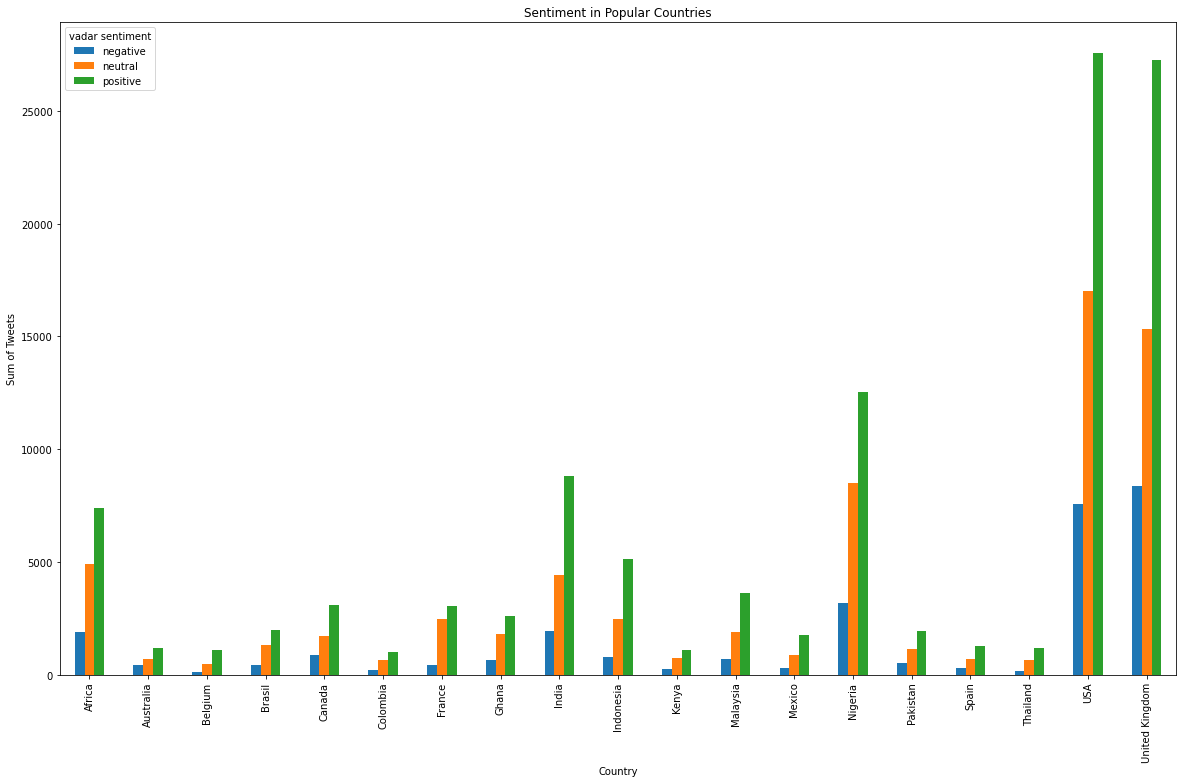

In [123]:
# Plot a bar chart using the DF
ax = place_sentiment.loc[(place_sentiment['positive'] > 1000) & (place_sentiment.index != 'Other')].plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20, 12)
# Change the axes labels
ax.set_xlabel("Country")
ax.set_ylabel("Sum of Tweets")
ax.set_title('Sentiment in Popular Countries')
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
#fig.savefig("Sentiment by Country.png")

#### Looking at the final 4 teams and sentiment around them when using their hashtag

England, Croatia, France and Belgium were the last four teams in the tournament, I will take a look at what the general sentiment around these teams were and how they compare. 

In [114]:
team_list = ['england','croatia','france','belgium']

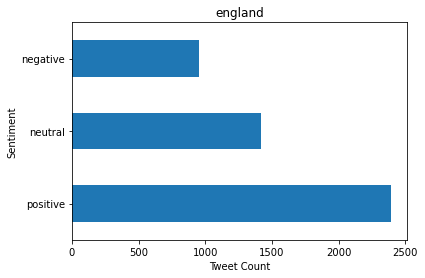

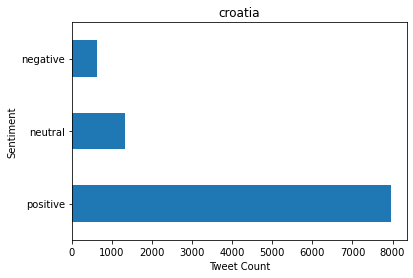

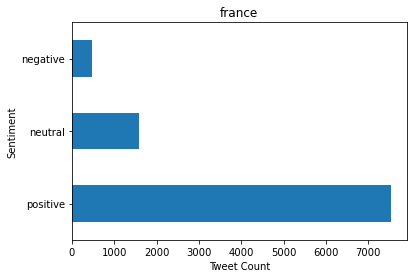

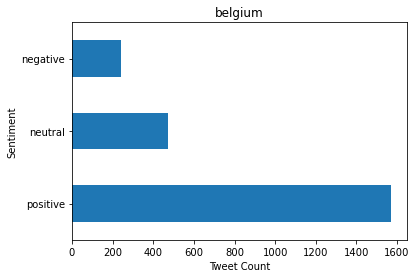

In [115]:
for i in range(len(team_list)):
    plt.figure()
    fifa_clean['vadar sentiment'][my_hashtag_df[team_list[i]] >= 1].value_counts().plot(kind='barh')
    plt.title(team_list[i])
    plt.xlabel('Tweet Count')
    plt.ylabel('Sentiment')
    plt.show()

The distributions show that tweets about england have the worst ratio of positive and negative sentiments. This would make sense as most tweeters are from england and they lsot in the semi finals.

#### Ronaldo vs Messi

This is an age old debate on how is better, lets see what the analysis of the sentiment on these two players are by looking at tweets they are mentioned in.

In [116]:
player_list = ['messi','ronaldo']

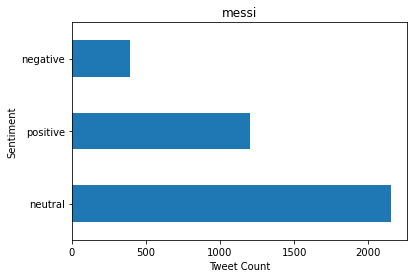

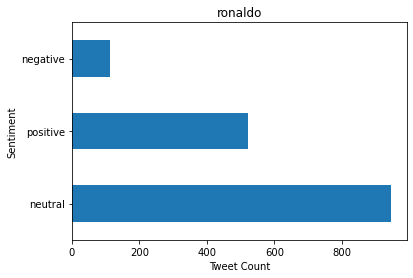

In [117]:
for i in range(len(player_list)):
    plt.figure()
    fifa_clean['vadar sentiment'][my_hashtag_df[player_list[i]] >= 1].value_counts().plot(kind='barh').plot(kind='barh')
    plt.title(player_list[i])
    plt.xlabel('Tweet Count')
    plt.ylabel('Sentiment')
    plt.show()

Similiar trends seen, but messi was talked about more.

Conclusion: 
There is a wealth of information available in these tweets that Fifa can use to help promote the upcoming world cup, I will be diving deeper into what some of these trends mean in my written report and how they can be leveraged to better the fan experience of the upcoming world cup. Additionally i will be further looking into some key insights that can be taken from the data using tableau in order to create a dashboard for Fifa to use.

In [118]:
#exporting cleaned csv
#fifa_clean.to_csv('fifa_clean.csv')